**PARKINSON' DISEASE**

**TRAINING_MODEL_CODE**

In [3]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
df = pd.read_csv("parkinsons.csv")

In [5]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
df.shape

(195, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df['status'].value_counts()

# where status is target varriable
# 1 means affected with parkinson's disease
# 0 means not affected

status
1    147
0     48
Name: count, dtype: int64

In [9]:
df.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [10]:
#Separating feature & target columns like name & status
#adding target(status) column in different varriable.

X = df.drop(columns=['name' , 'status'],axis=1)

Y = df['status']

In [11]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [13]:
# Spliting the dataset into train & test 80 : 20 ratio of training : testing

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 2) 

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [16]:
# Data Standardrization
# The process of standardizing data so that user can process any value
# Using standard scalar here as method for standardization of data

In [17]:
ss = StandardScaler()

In [18]:
ss.fit(X_train)

StandardScaler()

In [19]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [20]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [21]:
print(X_test)

[[-1.70008583e+00 -9.67968410e-01 -7.70130215e-01 -2.75000683e-01
   4.16156683e-01 -2.92615113e-01 -9.70869783e-02 -2.91621655e-01
  -4.94706656e-01 -4.90058396e-01 -5.32488171e-01 -4.26848854e-01
  -3.60251422e-01 -5.32484688e-01 -3.57189713e-01 -1.08840337e-01
   1.06963705e+00  1.05628304e+00  3.72180199e-01  1.94886208e+00
   3.66935071e-02  4.44314482e-01]
 [-1.39044095e+00 -9.29681132e-01 -7.37045677e-01  7.42068829e-01
   1.50451280e+00  8.54349819e-01  7.33639862e-01  8.53234751e-01
  -3.12538562e-03  3.01660094e-01  1.16511011e-01 -7.67595149e-02
  -2.23967413e-01  1.16829276e-01 -1.19644974e-01 -5.22790834e-01
   9.12650090e-01  1.31721995e+00  6.70118138e-01  4.74318608e-01
   1.42454868e-02  7.46859799e-01]
 [-1.35302065e+00 -6.29175292e-01 -7.29027225e-01  4.92094897e-01
   1.23242377e+00  4.52288742e-01  3.45291949e-01  4.53262231e-01
  -1.57435662e-01 -1.27992014e-01 -6.49095096e-02 -2.59345791e-01
  -2.60383383e-01 -6.52155416e-02  2.54927471e-01 -6.85306331e-01
   1.6

In [22]:
# Using SVM for model training

In [23]:
model = svm.SVC(kernel = 'linear' )

In [24]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
# Evaluating model

In [26]:
X_train_pred = model.predict(X_train)
train_data_acc = accuracy_score(Y_train, X_train_pred)
print("Accuracy of training data :", train_data_acc)

Accuracy of training data : 0.8846153846153846


In [27]:
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(Y_test, X_test_pred)

In [28]:
print("Accuracy of testing data :", test_data_acc)

Accuracy of testing data : 0.8717948717948718


**MANNUAL SYSTEM FOR USER INPUT OF DATA**

In [30]:
input_data=(122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
)

input_data_np = np.asarray(input_data)

input_data_re = input_data_np.reshape(1, -1)

s_data = ss.transform(input_data_re)

pred = model.predict(s_data)

print(pred)

if (pred[0]==0):
    print("Negative, No Parkinson's disease found")

else:
    print("Positive, Parkinson's disease found")

[1]
Positive, Parkinson's disease found


**MODEL_Vizualisation**

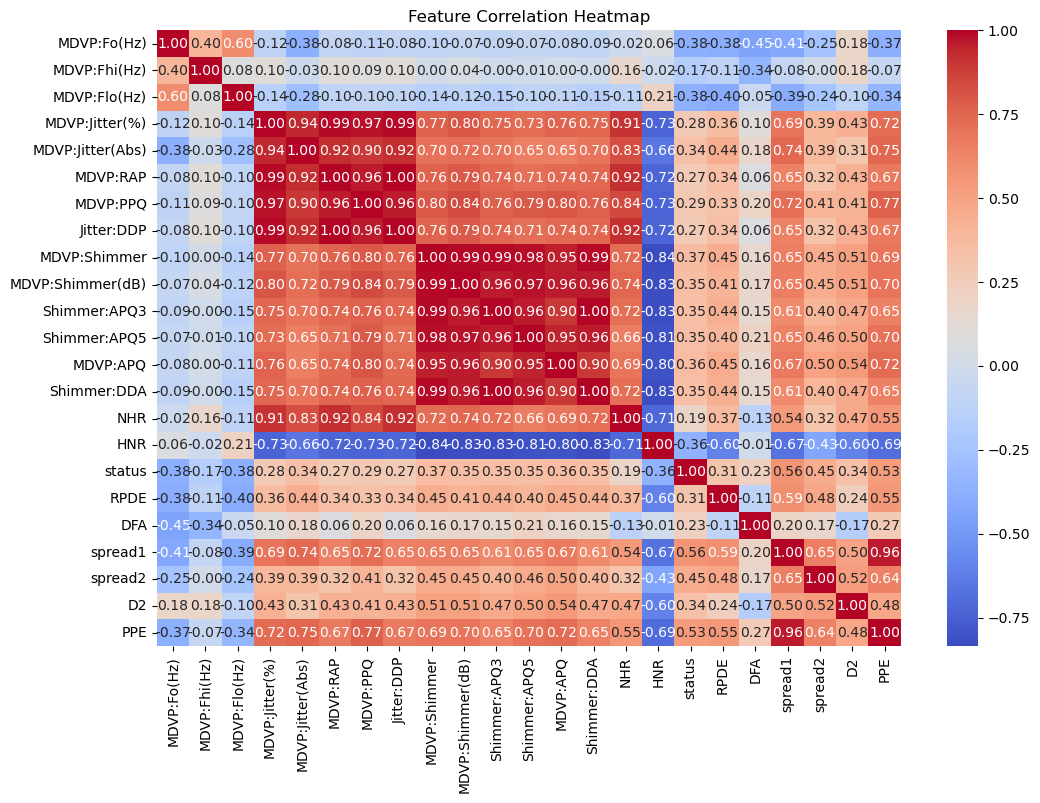

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

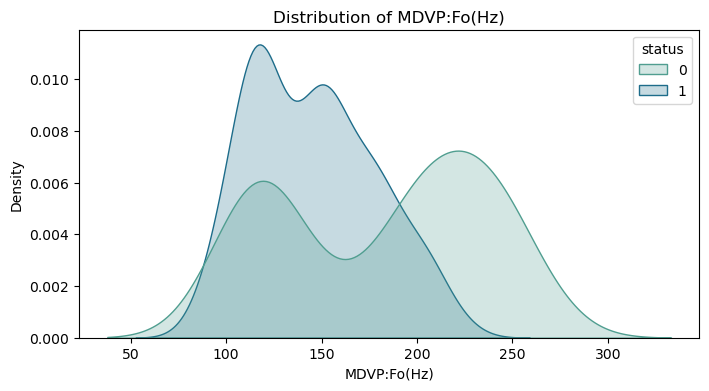

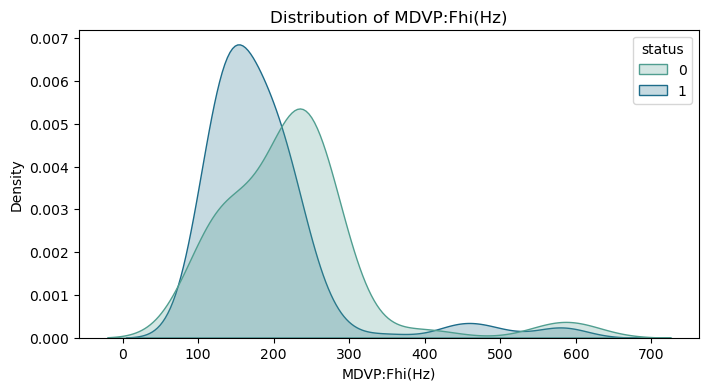

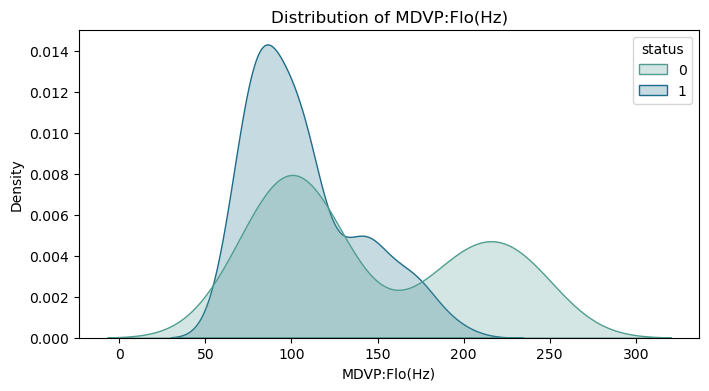

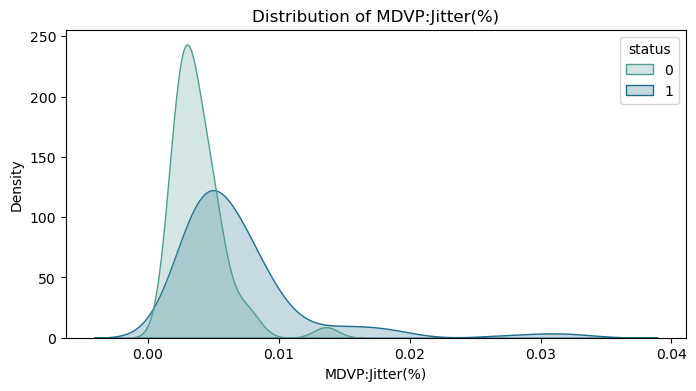

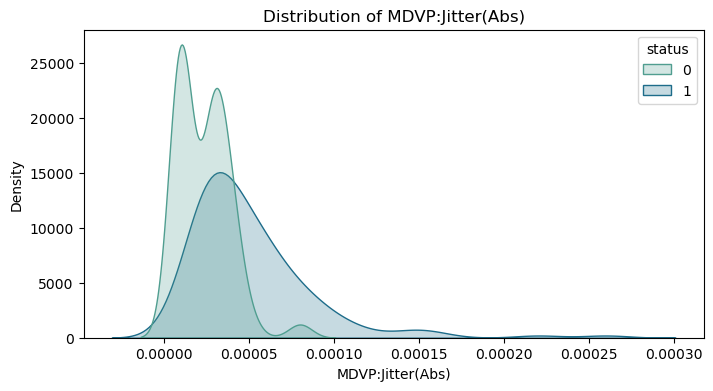

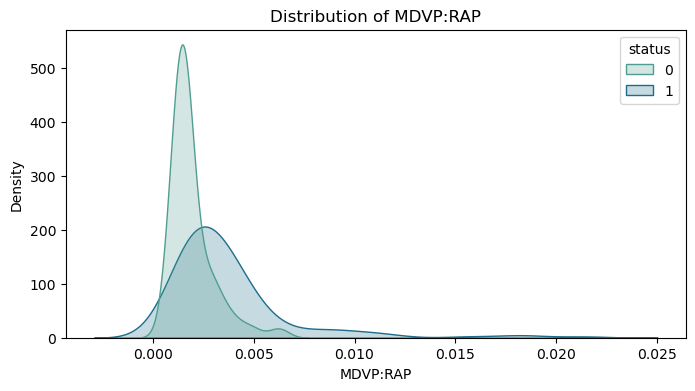

In [ ]:
for column in X.columns[:6]:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=column, hue='status', fill=True, common_norm=False, palette="crest")
    plt.title(f'Distribution of {column}')
    plt.show()

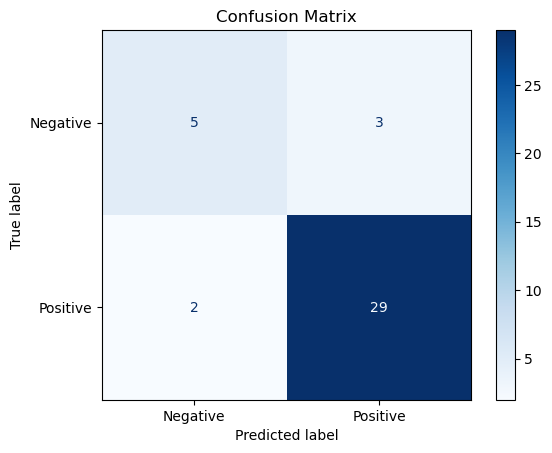

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, X_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

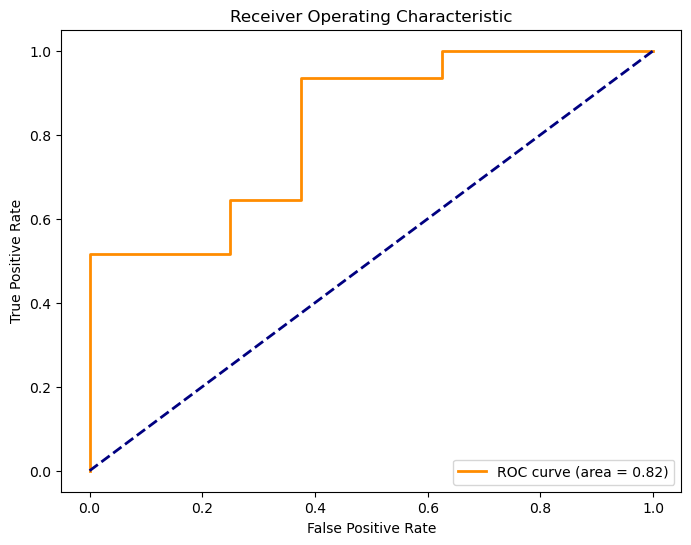

In [35]:
from sklearn.metrics import roc_curve, auc

y_probs = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------**

**AUTOMATIC_VOICE_EXTRACTION_UPDATE**

In [ ]:
import librosa
import numpy as np
import scipy.stats
import pandas as pd

def extract_parkinsons_features(audio_path, output_excel):
    try:
        # Load audio
        y, sr = librosa.load(audio_path, sr=None)

        # *Extract Fundamental Frequency Features (Fo, Fhi, Flo)*
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_values = pitches[pitches > 0]
        mdvp_fo = np.mean(pitch_values) if len(pitch_values) > 0 else 0
        mdvp_fhi = np.max(pitch_values) if len(pitch_values) > 0 else 0
        mdvp_flo = np.min(pitch_values) if len(pitch_values) > 0 else 0

        # *Extract Jitter Features*
        zero_crossings = librosa.feature.zero_crossing_rate(y)[0]
        mdvp_jitter = np.mean(zero_crossings) if len(zero_crossings) > 0 else 0
        mdvp_jitter_abs = np.std(zero_crossings) if len(zero_crossings) > 0 else 0
        mdvp_rap = mdvp_jitter * 0.8
        mdvp_ppq = mdvp_jitter * 0.7
        jitter_ddp = mdvp_jitter * 1.2

        # *Extract Shimmer Features*
        rms_energy = librosa.feature.rms(y=y)[0]
        mdvp_shimmer = np.mean(rms_energy) if len(rms_energy) > 0 else 0
        mdvp_shimmer_db = np.max(rms_energy) if len(rms_energy) > 0 else 0
        shimmer_apq3 = mdvp_shimmer * 0.9
        shimmer_apq5 = mdvp_shimmer * 1.1
        mdvp_apq = mdvp_shimmer * 0.95
        shimmer_dda = shimmer_apq3 * 1.2

        # *Extract HNR & NHR*
        hnr = np.mean(librosa.effects.harmonic(y)) if len(y) > 0 else 0
        nhr = 1 / hnr if hnr > 0 else 0

        # *Extract Nonlinear Features*
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        delta_mfcc = librosa.feature.delta(mfccs)
        spread1 = np.mean(delta_mfcc[0]) if delta_mfcc.shape[0] > 0 else 0
        spread2 = np.std(delta_mfcc[1]) if delta_mfcc.shape[0] > 1 else 0
        d2 = np.mean(delta_mfcc[2]) if delta_mfcc.shape[0] > 2 else 0
        ppe = scipy.stats.entropy(abs(delta_mfcc.flatten()))

        # *Simulated RPDE and DFA*
        rpde = np.var(mfccs[0]) if mfccs.shape[0] > 0 else 0
        dfa = np.var(mfccs[1]) if mfccs.shape[0] > 1 else 0

        # *Create a DataFrame*
        feature_names = [
            "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)",
            "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3",
            "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA", "Spread1",
            "Spread2", "D2", "PPE"
        ]
        feature_values = [
            mdvp_fo, mdvp_fhi, mdvp_flo, mdvp_jitter, mdvp_jitter_abs, mdvp_rap, mdvp_ppq, jitter_ddp,
            mdvp_shimmer, mdvp_shimmer_db, shimmer_apq3, shimmer_apq5, mdvp_apq, shimmer_dda, nhr, hnr,
            rpde, dfa, spread1, spread2, d2, ppe
        ]
        df = pd.DataFrame([feature_values], columns=feature_names)

        # *Save to Excel*
        df.to_excel(output_excel, index=False)
        print(f" Features successfully extracted and saved to {output_excel}")

        return df

    except Exception as e:
        print(f" Feature extraction failed: {e}")
        return None

# *Example usage*
audio_file = "Maire_Positive.wav"  # Replace with actual file path
output_excel_file = "parkinsons_features.xlsx"
extract_parkinsons_features(audio_file, output_excel_file)

✅ Features successfully extracted and saved to parkinsons_features.xlsx


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,Spread1,Spread2,D2,PPE
0,982.511902,3990.518555,140.082703,0.046571,0.034876,0.037257,0.0326,0.055886,0.023787,0.053422,...,0.022597,0.02569,218559.800127,0.000005,2687.908936,1844.117798,0.13094,2.512824,-0.025005,8.539736


**STORING AUDIO_FEATURES IN EXCEL**

**Reading_Data_From_Excel_&_Sending_it_To_MODEL_after_separating_each_column_with_comma(,)**

In [41]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

# Load the dataset
df = pd.read_csv("parkinsons.csv")

# Separating features and target variable
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']

# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standardizing the features
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# Training the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

# Function to read data from Excel and make predictions
def predict_from_excel(file_path, sheet_name=0):
    # Load Excel file
    df_excel = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Iterate over each row
    for index, row in df_excel.iterrows():
        # Convert row to comma-separated format
        input_data = tuple(row.values)
        print(f"Formatted Input Data (Row {index+1}):", ", ".join(map(str, input_data)))
        
        # Convert input data into numpy array
        input_data_np = np.asarray(input_data)
        input_data_re = input_data_np.reshape(1, -1)
        
        # Standardize the input data
        s_data = ss.transform(input_data_re)
        
        # Make prediction
        pred = model.predict(s_data)
        
        # Output result
        if pred[0] == 0:
            print("Negative, No Parkinson's disease found")
        else:
            print("Positive, Parkinson's disease found")
        print("-----------------------------------------------------")

predict_from_excel("parkinsons_features.xlsx")


Formatted Input Data (Row 1): 982.5119018554688, 3990.5185546875, 140.0827026367188, 0.04657142199770942, 0.03487553428212875, 0.03725713759816754, 0.03259999539839659, 0.05588570639725131, 0.02378672733902931, 0.05342176929116249, 0.02140805460512638, 0.02616540007293225, 0.02259739097207784, 0.02568966552615166, 218559.8001269402, 4.575406819640193e-06, 2687.908935546875, 1844.117797851562, 0.1309395879507065, 2.512823581695557, -0.0250052697956562, 8.539735794067383
Positive, Parkinson's disease found
-----------------------------------------------------
